# Can you earn on a Bad movie by marketing it extensively on Social Media?

You make a good movie with High quality content, it is highly likely to work, but what if it is rated bad, will it still work well with a great marketing effect.

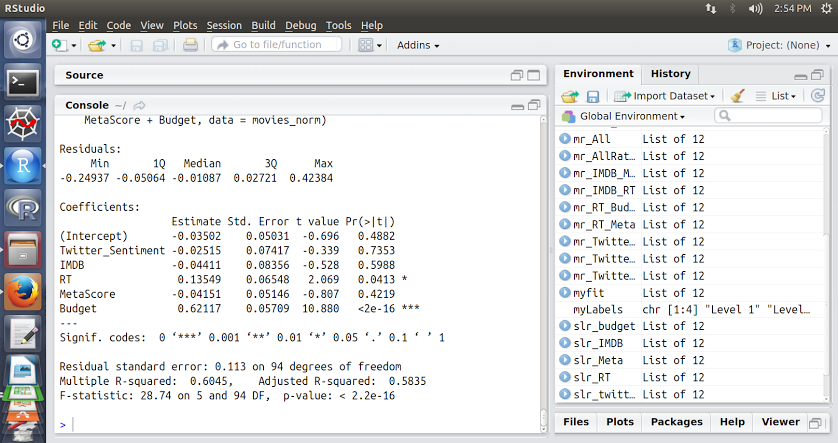

In [3]:
from IPython.display import Image
Image(filename='1.png')

## How did we do it?

We use the Beautiful soup package to read all the contents of the webpage into a soip element and using find_all we get the contents of the page we need.

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

url = "http://www.the-numbers.com/movie/budgets/all"
r=requests.get(url)
data=r.text
soup=bs(data,"html.parser")
each=soup.find_all('td',class_="data")

mydata=[]
for i in each:
    i=i.getText()
    mydata.append(i)


In [ ]:
length=len(mydata)/4
length=int(length)
print(length)

In [ ]:
import numpy as np
PRICES=np.reshape(mydata,(length,4))

We use numpy to reshape the data in a 4 column format as we require.

In [ ]:
import pandas as pd
heading1=['index','budget','domestic','worldwide']
pricelist = pd.DataFrame(PRICES, columns=heading1)
print(pricelist)

Converting the whole thing in a pandas dataframe.

In [ ]:
names=soup.findAll('a')
myname=[]

for name in names:
    name=name.getText()
    myname.append(name)

names2=[]    
for i in myname[50:(50+2*length)]:
    names2.append(i)
    
NAMES=np.reshape(names2,(length,2))
print(NAMES)

Creating a list of the names of the movies along with the date and the year they were released in.

In [ ]:
import pandas as pd
heading2=['date','name']
namelist = pd.DataFrame(NAMES, columns=heading2)
print(namelist)

In [ ]:
myfilm = pd.concat([namelist, pricelist], axis=1, join='outer')

Concatenating the name and budget frames, based on the index column. We use outer join here.

In [ ]:
print(myfilm)

In [ ]:
myfilm.to_csv('films.csv')

Writing the dataframe to an output file films.csv

### Getting IMDB and MetaScore

In [ ]:
import urllib.request
from bs4 import BeautifulSoup as bs

get=[]

for x in range(1,100,1):

    url="https://www.imdb.com/search/title?year=2015,2015&title_type=feature&sort=moviemeter,asc&page="+str(x)    
    request = urllib.request.Request(url)
    response = urllib.request.urlopen(request)
    data = response.read()
    response.close()

# Create the soup
    soup = bs(data,"html.parser") 

    get.extend(soup.find_all("div",class_="lister-item-content"))
   
    # Print parse tree
    #print(soup.prettify())

Running a loop so all 100 pages of the IMDB Ratings can be scraped. The extend function keeps on adding into the list the scraped data.

In [ ]:
ratings=[]
for elements in get:
    if elements.find("div",class_="inline-block ratings-imdb-rating"):
        z=elements.find("div",class_="inline-block ratings-imdb-rating").get_text().strip()
        ratings.append(float(z))
    else:
        ratings.append("No Data")

Getting the IMDB Ratings for all the movies which have realesed in 2015 and putting them in a list

In [ ]:
list1=[]
for elements in get:
    if elements.find("h3", class_="lister-item-header"):
        list1.append(elements.find("h3", class_="lister-item-header"))
    else:
        list1.append(0.0)

 Getting the H3 tags which contain the Movie Names

In [ ]:
names=[]
for elements in list1:
    if elements.find("a"):
        names.append(elements.find("a").get_text().strip())
    else:
        names.append("No Data")

Extractng the names out of the h3 header and putting them in a list names.

In [ ]:
meta=[]
for elements in get:
    if elements.find("div",class_="inline-block ratings-metascore"):
        z=elements.find("div",class_="inline-block ratings-metascore").get_text()[0:5].strip()
        meta.append(int(z))
    else:
        meta.append(0)

Extracting the metacritic ratings and putting them in a list meta

In [ ]:
df1 = pd.DataFrame ({"Title" : names , "IMDB" : ratings , "MetaScore" : meta})

Creating a dataframe with the columns of the data scraped from IMDB.

In [ ]:
df1.to_csv("IMDB(100 Pages).csv")

Writing the dataframe to the Ouput CSV file.

### Twitter Sentiment Analysis using TextBlob

In [ ]:
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Importing tweepy, textblob  to get data from twitter and TextBlob to do the sentiment analysis. Gettin OAuthHandler for API and OAuth verification.

In [ ]:
def getTwitterData(searchTerm):
  
    #first get 300 twitters
    tweets=[]
    for tweet in tweepy.Cursor(api.search,q=searchTerm).items(300):
        tweets.append(tweet.text)
    
    #lower cases
    lowered_texts = []
    for texts in tweets:
        try: 
            mytext = str(texts.lower())
            lowered_texts.append(mytext)
        except:
            pass
    
    #remove punctuations
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    s_sans_punct = ""
    for letter in str(lowered_texts):
        if (letter not in punctuation) and (letter in "abcdefghijklmnopqrstuvwxyz "):
            s_sans_punct += letter
    
    #get sentiment score using textblob
    t=TextBlob(s_sans_punct)
    sentiment=t.sentiment.polarity
    #sentiment_new=100*sentiment

    return sentiment

The codes first does the OAuth authentication, using the keys we recieved from twitter API. The code also removes all punctuation from the names entered as input. It also converts all the strings in lower case. Add the sentiment score into a datafram along with a name and returns this dataframe.

In [ ]:
names=pd.read_csv('Top100Movies.csv')

Reading a csv file which contains the top 100 movies by revenue in the year 2015

In [ ]:
x=names["Title"]

Taking the title column of the imported csv file

In [ ]:
mysenti=[]

In [ ]:
import sched, time

In [ ]:
for n in namelist:
    print(n)
    score = getTwitterData(n)
    print(score)
    time.sleep(60)
    mysenti.append(score)

Twitter allows only 15 API calls per 15 min. So after each call we are giving a break of 1 minute.

In [ ]:
with open('/home/hwu/Downloads/senti_all.txt','w') as f:
    wr = csv.writer(f, dialect='excel')
    wr.writerow(mysenti)

Writing the ouput to a csv file as in above